## Intro to Machine Learning (UDACITY Course)
### Zukhriddin Juliev
<a id = '0'></a>

Description: This project is compilation of all functions learned during Udacity Intro to machine Learning online course
### Outline

1. [Introduction: Data and Question](#1)
2. [Data preparation, importing functions](#2)
3. [Application of functions using default features](#3)
4. [Application by choosing best parametres](#4)
5. [Logistic Regression with Regularization](#5)
6. [Linear Model with Lasso](#6)
7. [Concluding remarks](#7)

### Introduction
<a id = '1'></a>
In this project I will be using different algorithms of machine learning. I will outline the algorithmes, generate accuracy scores and compare.
The project uses ENRON email dataset. The main question asks what is most successful algorithm to predict the 'Person of Interest (POI)' within the dataset. Data consist of data on 145 enron staff. There are 19 features: financial, email info etc.

### Data Preparation
<a id = '2'></a>
Importing main packages and creating a function to clean data from zeros, NaN and missing values.

In [1]:
import numpy as np
import pandas as pd
import joblib

def featureFormat(dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ 
        convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """

    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import joblib
        keys = joblib.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("Error: Key ", feature, " Not Present")
                return
            value = dictionary[key][feature]
            if value == 'NaN' and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != 'NaN':
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or 'NaN' in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

Importing dataset and splitting it into train and test samples

In [2]:
import joblib

data_dict = joblib.load(open("final_project_dataset_unix.pkl", "rb") )

features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
                 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
              'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']

data = featureFormat(data_dict, features_list)

## Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rescaled_data = scaler.fit_transform(data)

target = []
features = []
for item in rescaled_data:
        target.append( item[0] )
        features.append( item[1:] )

#Splitting the data into train and test samples
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.25, random_state = 42)

Importing main ML functions and evaluation method.

In [3]:
## Model packages
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
## Evaluation
from sklearn.metrics import accuracy_score

In [4]:
## Visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('tableau-colorblind10')
#plt.style.use('Solarize_Light2')
plt.style.use('bmh')

In [5]:
## Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

### [Return to START](#0)

### Application of functions using default parametres
<a id = '3'></a>
Creating a function to calculate scores for each ML function.

In [6]:
def scores(function):
    clf = function
    clf.fit(xtrain, ytrain)
    pred = clf.predict(xtest)
    return accuracy_score(pred, ytest)

In [7]:
functions_1 = {'Gaussian': GaussianNB(), 'SVC': SVC(), 'KMeans': KMeans(), 'KNeighbors': KNeighborsClassifier(), 
             'Ada Boost Classifier': AdaBoostClassifier(), 'Decision Tree Classifier': DecisionTreeClassifier(), 
             'Random Forest Classifier': RandomForestClassifier()}
Dict_1 = {}
for i, j in functions_1.items():
    Dict_1[i] = {}
    accuracy = scores(j)
    Dict_1[i]['Score'] = accuracy

table_1 = pd.DataFrame(Dict_1).transpose().sort_values('Score', ascending = False)
table_1

,Score
SVC,0.918919
KNeighbors,0.918919
Random Forest Classifier,0.918919
Ada Boost Classifier,0.810811
Decision Tree Classifier,0.756757
Gaussian,0.270270
KMeans,0.162162


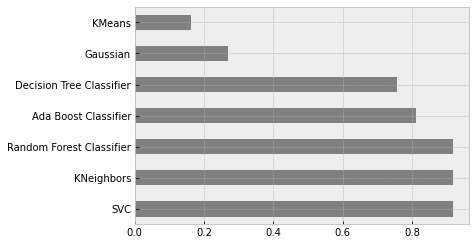

In [8]:
table_1['Score'].plot.barh(color = 'gray');

### Application of functions using best parametres
<a id = '4'></a>

In [9]:
functions_2 = {SVC(): {'kernel': ('linear', 'rbf'), 'C': np.arange(1, 11)}, 
             KMeans(): {'n_clusters' : range(2,11)}, 
             KNeighborsClassifier(): {'n_neighbors': range(2,11), 
                                      'weights': ('uniform', 'distance'),
                                      'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}, 
             AdaBoostClassifier(): {'n_estimators': range(1,50,5)}, 
             DecisionTreeClassifier(): {'criterion': ('gini', 'entropy', 'log_loss'), 
                                        'max_features': ('sqrt', 'log2')}, 
             RandomForestClassifier(): {'n_estimators': range(10,100, 10), 
                                        'criterion': ('gini', 'entropy', 'log_loss'), 
                                        'max_features': ('sqrt', 'log2')}}

In [10]:
from sklearn.model_selection import GridSearchCV
def grid_search(function, param):
    clf = GridSearchCV(function, param)
    clf.fit(xtrain, ytrain)
    return clf.best_params_, accuracy_score(clf.predict(xtest), ytest)

In [11]:
Dict_2 = {}
for i, j in functions_2.items():
    name = str(i).replace('()', "")
    Dict_2[name] = {}
    params, score = grid_search(i,j)
    Dict_2[name]['Best Parameters'] = params
    Dict_2[name]['Score'] = score

In [12]:
## Adding Gaussian NB with default parametres as best parametres
Dict_2['Gaussian NB'] = {}
Dict_2['Gaussian NB']['Best Parameters'] = 'Default'
Dict_2['Gaussian NB']['Score'] = scores(GaussianNB())

In [13]:
table_2 = pd.DataFrame(Dict_2).transpose().sort_values('Score', ascending = False)
table_2

,Best Parameters,Score
SVC,"{'C': 1, 'kernel': 'rbf'}",0.918919
KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 6, 'weigh...",0.918919
AdaBoostClassifier,{'n_estimators': 1},0.918919
RandomForestClassifier,"{'criterion': 'log_loss', 'max_features': 'log...",0.918919
DecisionTreeClassifier,"{'criterion': 'log_loss', 'max_features': 'log2'}",0.891892
Gaussian NB,Default,0.27027
KMeans,{'n_clusters': 10},0.027027


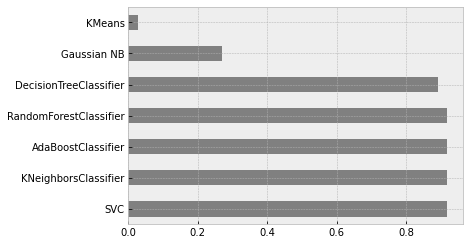

In [14]:
table_2['Score'].plot.barh(color = 'gray');

### Logistic Regression with Regularization
<a id = '5'></a>
to use Lasso I will apply cross validation. The method uses train and test sets interchangingly. 

In [15]:
clf = LogisticRegression(penalty = 'l1', solver = 'liblinear')
clf.fit(xtrain, ytrain)
print(clf.score(xtest, ytest))

0.918918918918919


In [16]:
clf = LogisticRegression(penalty = 'l2', solver = 'liblinear')
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)
print(accuracy_score(pred, ytest))

0.918918918918919


### Linear model with Lasso
<a id = '6'></a>
This part is just for application. Linear model is not appropriate since our target value is descrete equaling [1,0].

In [18]:
alphas = np.exp(np.linspace(-2, -12, 25))
from sklearn.linear_model import LassoCV, Lasso
lasso = LassoCV(cv=5, alphas=alphas, max_iter=5000).fit(features, target)

In [19]:
# Choosing the optimal alpha
def pickalpha(lassocv) :
    imin = np.argmin(lassocv.mse_path_.mean(axis=1))
    msemin = lassocv.mse_path_.mean(axis=1)[imin]
    se = lassocv.mse_path_.std(axis=1)[imin]
    alpha= min([alpha for (alpha, mse) in zip(lassocv.alphas_, lassocv.mse_path_.mean(axis=1)) if mse<msemin+se])
    return(alpha)
optimal_alpha = pickalpha(lasso)

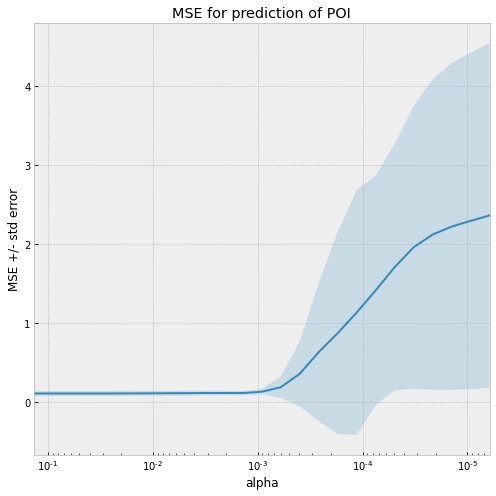

In [20]:
### Graphing all possible MSE along alphas
plt.figure(figsize = (7,7))
alphas = lasso.alphas_
mse = lasso.mse_path_.mean(axis=1)
std_error = lasso.mse_path_.std(axis=1)
plt.plot(alphas,mse)
plt.fill_between(alphas, mse + std_error, mse - std_error, alpha=0.2)
plt.ylabel('MSE +/- std error')
plt.xlabel('alpha')
plt.xlim([alphas[0], alphas[-1]])
plt.xscale("log")
plt.title("MSE for prediction of POI")
plt.tight_layout()

### Conclusion
<a id = '6'></a>
Among all tried models we can achieve maximium prediction power of 91.89. Even logistic regression can predict at this level. The most succesful ones are Random forest and SVM which can sometimes predict close to 94-97%. Otherwise, least predictive models are KMeans and  Gaussian Naive Baesian.

### [Return to START](#0)